In [ ]:
pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


Read and Preprocess the Data

In [ ]:
stock_symbol = 'SBIN.NS' #State Bank Of India
start_date = '2005-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end = end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2005-01-03  61.753441  62.545998  61.338287  61.871380  48.866096  22590407
2005-01-04  62.163872  62.168587  60.965599  61.319420  48.430157  26206416
2005-01-05  61.324139  61.876095  55.762081  58.257694  46.012005  52142335
2005-01-06  58.050117  59.338024  56.247993  57.016964  45.032078  47719200
2005-01-07  57.498161  58.493572  57.106598  58.087860  45.877861  30985674


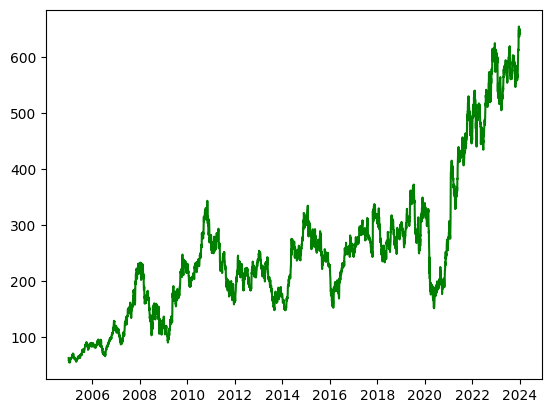

In [ ]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

**Train The Model**

In [ ]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.817% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.817% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for t

Finding best initial lr:   0%|          | 0/242 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,540.463501,641.718018,0.691033,0.0,0
1,272.348206,342.958557,0.297628,0.0,1
2,122.842300,154.356049,0.098801,0.0,2
3,79.012848,102.449905,0.051255,0.0,3
4,59.511818,77.486282,0.031410,0.0,4
...,...,...,...,...,...
65,32.503601,47.298866,0.012374,0.0,65
66,32.536400,47.516479,0.012411,0.0,66
67,32.399990,47.183434,0.012344,0.0,67
68,32.537682,47.450420,0.012449,0.0,68


**Evaluate The Model**

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.817% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.817% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralpr

Predicting: 74it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.817% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.817% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype

Predicting: 74it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


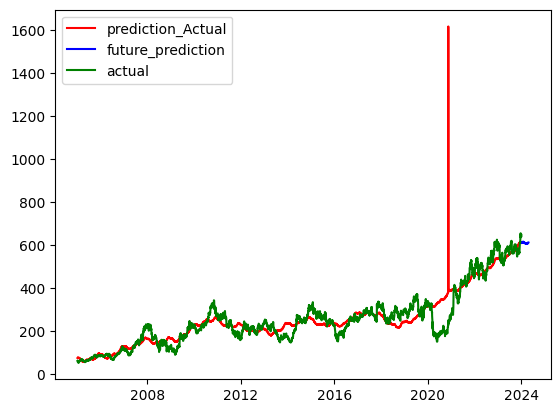

In [ ]:
future = model.make_future_dataframe(stocks, periods = 80)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_Actual', c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.show()

In [ ]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The be

In [ ]:
print(forecast)
forecast.to_csv('forecast.csv')

           ds     y       yhat1       trend  season_yearly  season_weekly
0  2024-01-01  None  610.678650  777.093384      10.932866    -177.347610
1  2024-01-02  None  610.738342  777.295227      10.856954    -177.413818
2  2024-01-03  None  610.665161  777.496948      10.795369    -177.627182
3  2024-01-04  None  609.790283  777.698792      10.747940    -178.656464
4  2024-01-05  None  611.855164  777.900391      10.713014    -176.758240
..        ...   ...         ...         ...            ...            ...
75 2024-04-15  None  610.758362  798.277039     -10.917921    -176.600784
76 2024-04-16  None  610.655273  798.478882     -10.910689    -176.912933
77 2024-04-17  None  609.663086  798.680664     -10.889886    -178.127716
78 2024-04-18  None  610.695557  798.882263     -10.855069    -177.331589
79 2024-04-19  None  612.198120  799.084106     -10.806151    -176.079834

[80 rows x 6 columns]
